<a href="https://colab.research.google.com/github/larunerdman/JSC270_Assg2/blob/main/JSC270_Assignment2_starter_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Libraries you'll likely need

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Importing data

In [2]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

In [3]:
income94.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Exploring Data 2) 
Missing values for strings are represented using " ?" (NOTE: there is a space...)
- workclass
- occupation
- native_country

In [5]:
income94 = income94.replace(' ?', np.nan)
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           30725 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          30718 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      31978 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
for col in ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']:
    income94[col] = income94[col].astype('float64')

#### Exploring Data 3)
Two problems
1. The Capital gain and loss distribution should be transformed into a new variable. Because there are some values that are too high and this makes the entire distribution very hard to describe.
2. There are too many capital gain / loss of 0, hard to visualize the distribution of the rest $\rightarrow$ just ignore the 0 ones

Solution: Take the log of the capital gain and loss and ignore those with 0 gain and loss.

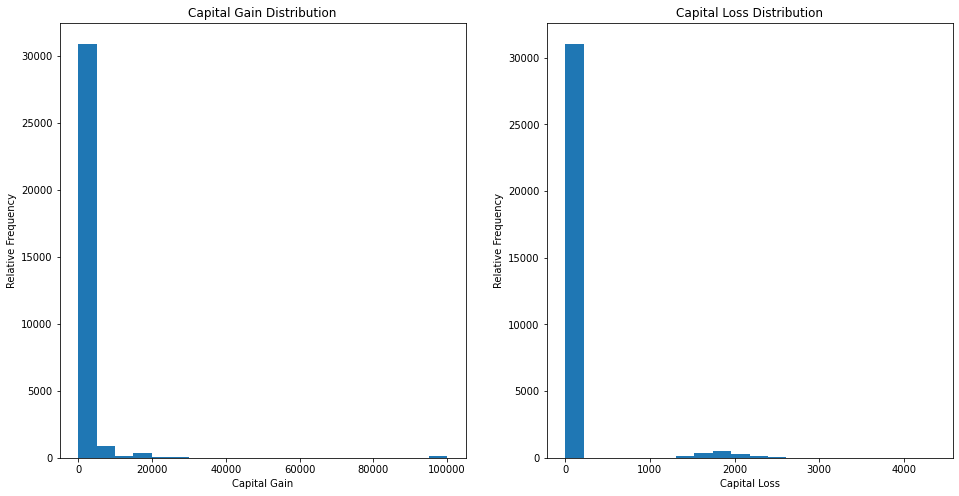

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].hist(income94.capital_gain, bins=20)
axs[0].set_title('Capital Gain Distribution')
axs[0].set_xlabel('Capital Gain')
axs[0].set_ylabel('Relative Frequency')

axs[1].hist(income94.capital_loss, bins=20)
axs[1].set_title('Capital Loss Distribution')
axs[1].set_xlabel('Capital Loss')
axs[1].set_ylabel('Relative Frequency')

plt.show()

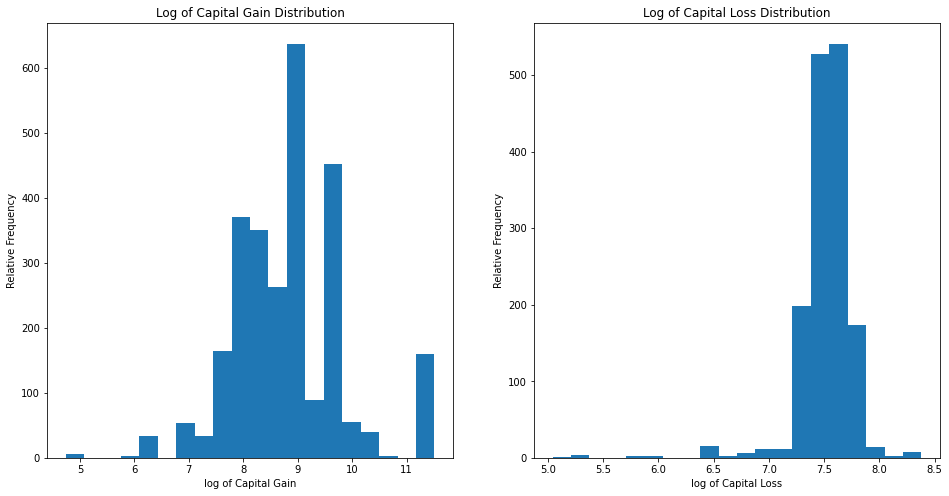

In [8]:
# Transform by taking log (change the 0s to 1s because log(0) undefined...)
income94['log_capital_gain'] = income94.capital_gain.apply(lambda x: np.log(x) if x > 0 else np.log(1))
income94['log_capital_loss'] = income94.capital_loss.apply(lambda x: np.log(x) if x > 0 else np.log(1))

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].hist(income94[income94.log_capital_gain > 0].log_capital_gain, bins=20)
axs[0].set_title('Log of Capital Gain Distribution')
axs[0].set_ylabel('Relative Frequency')
axs[0].set_xlabel('log of Capital Gain')

axs[1].hist(income94[income94.log_capital_loss > 0].log_capital_loss, bins=20)
axs[1].set_title('Log of Capital Loss Distribution')
axs[1].set_ylabel('Relative Frequency')
axs[1].set_xlabel('log of Capital Loss')

plt.show()

#### Exploring Data 4)
The weights are not symetrically distributed by looking at the data. The weights are skewed to the left and have more people with lower weights.

Comparing the distribution between male and female, we observe that their distribution are very similar. In order to look at outliers effectively, we want to make sure male and female are drawn from the same distribution and therefore can be examined altogether rather than separately. We conduct this distribution test with KS-test with the null hypothesis being "They are from the same distribution".

The p-value is greater than 0.05 and we fail to reject the null hypothesis. Let us now suppose they are drawn from same distribution and examine the male and female together remove the outliers from the entire population together. There appears to have some outliers that are very far off from the rest of the weights and should be removed; the criteria used is 3 standard deviation.  

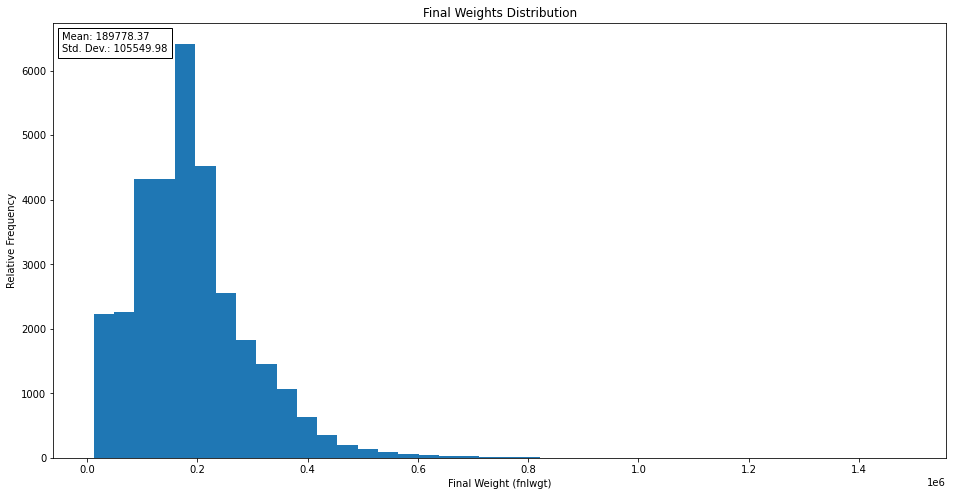

In [9]:
from matplotlib.offsetbox import AnchoredText

mu = income94.fnlwgt.mean()
std= income94.fnlwgt.std()

fig, ax = plt.subplots(figsize=(16,8))

ax.hist(income94.fnlwgt, bins=40)
anchored_text = AnchoredText(f"Mean: {mu:.2f}\nStd. Dev.: {std:.2f}", loc=2)
ax.add_artist(anchored_text)

ax.set_xlabel('Final Weight (fnlwgt)')
ax.set_ylabel('Relative Frequency')
ax.set_title('Final Weights Distribution')
plt.show()

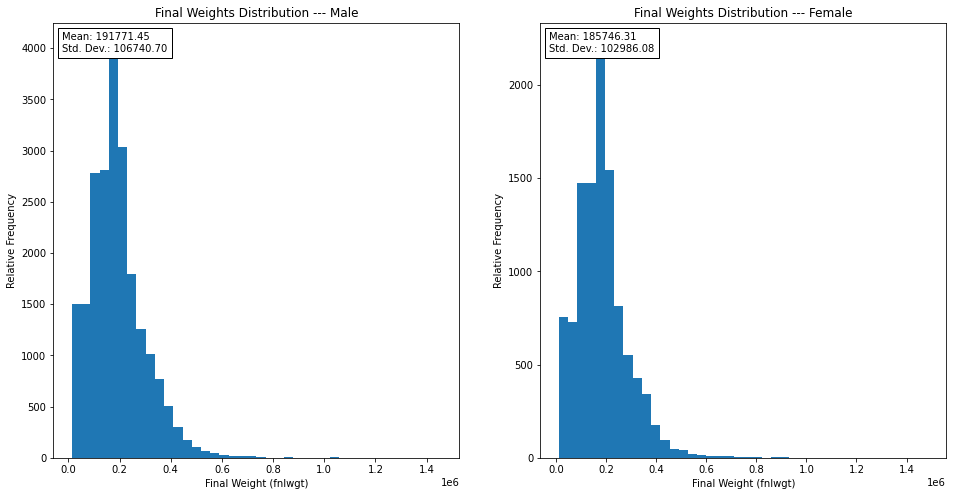

In [10]:
# The distributions of male and female look very similar, need to test if they are drawn from same distribution
mu_m = income94[income94.sex == ' Male'].fnlwgt.mean()
std_m = income94[income94.sex == ' Male'].fnlwgt.std()
mu_f = income94[income94.sex == ' Female'].fnlwgt.mean()
std_f = income94[income94.sex == ' Female'].fnlwgt.std()

fig, axs = plt.subplots(1, 2, figsize=(16,8))
axs[0].hist(income94[income94.sex == ' Male'].fnlwgt, bins=40)
anchored_text1 = AnchoredText(f"Mean: {mu_m:.2f}\nStd. Dev.: {std_m:.2f}", loc=2)
axs[0].add_artist(anchored_text1)
axs[0].set_xlabel('Final Weight (fnlwgt)')
axs[0].set_ylabel('Relative Frequency')
axs[0].set_title('Final Weights Distribution --- Male')

axs[1].hist(income94[income94.sex == ' Female'].fnlwgt, bins=40)
anchored_text2 = AnchoredText(f"Mean: {mu_f:.2f}\nStd. Dev.: {std_f:.2f}", loc=2)
axs[1].add_artist(anchored_text2)
axs[1].set_xlabel('Final Weight (fnlwgt)')
axs[1].set_ylabel('Relative Frequency')
axs[1].set_title('Final Weights Distribution --- Female')
plt.show()

In [11]:
## Conduct KS test to see if male and female distributions are different
val_m = (income94[income94.sex == ' Male'].fnlwgt - mu_m) / std_m
val_f = (income94[income94.sex == ' Female'].fnlwgt - mu_f) / std_f

from scipy import stats
ks, pval = stats.ks_2samp(val_m, val_f)
print(f"KS statistics: {ks:.4f}")
print(f"p-value: {pval:.4f}")

KS statistics: 0.0154
p-value: 0.0657


c:\python3.8\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\python3.8\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


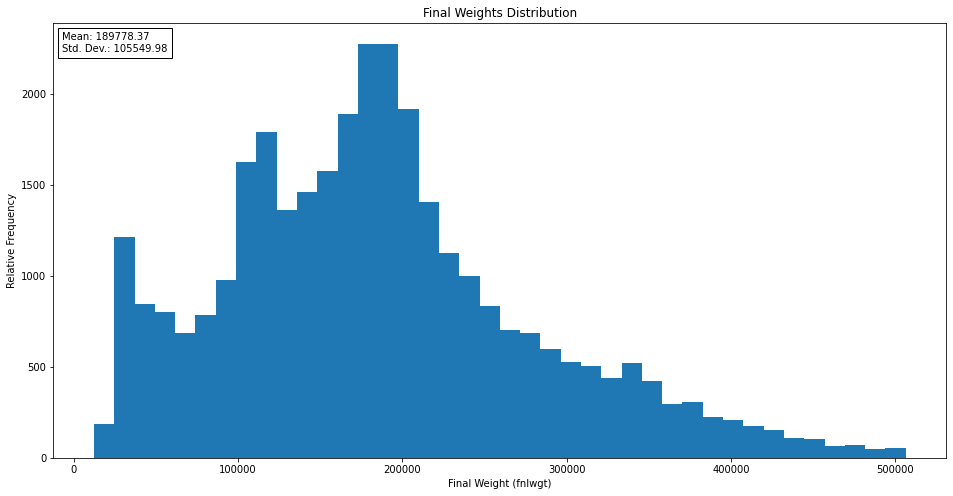

In [12]:
## Remove the outliers and plot
income94.fnlwgt = income94.fnlwgt.apply(lambda x: np.nan if x > mu+3*std else x)
income94.fnlwgt = income94.fnlwgt.apply(lambda x: np.nan if x < mu-3*std else x)

fig, ax = plt.subplots(figsize=(16,8))

ax.hist(income94.fnlwgt, bins=40)
anchored_text = AnchoredText(f"Mean: {mu:.2f}\nStd. Dev.: {std:.2f}", loc=2)
ax.add_artist(anchored_text)

ax.set_xlabel('Final Weight (fnlwgt)')
ax.set_ylabel('Relative Frequency')
ax.set_title('Final Weights Distribution')
plt.show()

### Correlation

#### a) & b)

Looking at the correlations, it appears that there is a weak correlation between hours_per_week and education_num; the other two essentially have no correlation at all. Between hours_per_week and education_num where there is weak correlation $>|0.1|$, the p-value is very small, indicating that this correlation is indeed statistically significant.

The correlation direction between education_num and hours_per_week is expected since people who study more tend to work harder and thus work longer hours. Furthermore, it is also expected that the correlation is not very strong because people vary a lot; and it depends heavily on the nature of the job.

In [13]:
r_age_edu, pval0 = stats.pearsonr(income94.age, income94.education_num)
r_age_hrs, pval1 = stats.pearsonr(income94.age, income94.hours_per_week)
r_edu_hrs, pval2 = stats.pearsonr(income94.education_num, income94.hours_per_week)

print(f"Age and Education_num:\n\tCorrelation: {r_age_edu :.4f}\n\tp-val:{pval0}")
print(f"Age and Hours_per_week:\n\tCorrelation: {r_age_hrs :.4f}\n\tp-val:{pval1}")
print(f"Hours_per_week and Education_num:\n\tCorrelation: {r_edu_hrs :.4f}\n\tp-val:{pval2}")

Age and Education_num:
	Correlation: 0.0365
	p-val:4.305718002110826e-11
Age and Hours_per_week:
	Correlation: 0.0688
	p-val:2.011285562164848e-35
Hours_per_week and Education_num:
	Correlation: 0.1481
	p-val:4.2366474792071436e-159


#### Correlation c)

For male, there appears to be a very slight correlation between age and education_num where higher age is tied to higher education_num. The p-value is very small and thus implies that this correlation is significant. 

For female however, the correlation is much smaller and the p-value is high (> 0.05) indicating that this correlation number is not statistically significant and may be due to chance. Thus we cannot say there is a correlation between age and education_num for female.

In [13]:
male = income94[income94.sex == ' Male']
female = income94[income94.sex == ' Female']

corr_m, pval_m = stats.pearsonr(male.age, male.education_num)
corr_f, pval_f = stats.pearsonr(female.age, female.education_num)

print(f"Male:\n\tCorrelation: {corr_m :.4f}\n\tp-val:{pval_m :.4f}")
print(f"Female:\n\tCorrelation: {corr_f :.4f}\n\tp-val:{pval_f :.4f}")

Male:
	Correlation: 0.0605
	p-val:0.0000
Female:
	Correlation: -0.0179
	p-val:0.0632


#### Correlation d)

We note that the change in both variance and covariance are significant for education_num and hours_per_week. This means that people who have higher weights were under-represented when looking at unweighted numbers. This also implies that people who have higher weights usually have characteristics that deviates more from the rest (i.e. the lower weights). 

The reason for this change could be explained by the distribution of the weights as it is skewed left. So the people who have higher weights are in smaller proportion and their education_num and hours_per_week are under-represented.

In [21]:
x1 = income94.education_num
x2 = income94.hours_per_week
w = income94.fnlwgt

In [22]:
income94[['education_num', 'hours_per_week']].cov()

,education_num,hours_per_week
education_num,6.618890,4.705338
hours_per_week,4.705338,152.458995


In [23]:
income94['weighted_ed_num'] = x1 * w / np.mean(w)
income94['weighted_hrs'] = x2 * w / np.mean(w)
income94[['weighted_ed_num', 'weighted_hrs']].cov()

,weighted_ed_num,weighted_hrs
weighted_ed_num,33.751773,107.926970
weighted_hrs,107.926970,600.474005


### Linear Regression

#### a)

The regression coefficient is positive for male when looking at hours_per_week, therefore male tend to work more than female.

In [15]:
model = smf.ols('hours_per_week ~ C(sex)', data=income94).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:04:56   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          36.4104      0.116    314.412      0.000      36.183      36.637
C(sex)[T. Male]     6.0177      0.142     42.510      0.000       5.740       6.295
==============================================================================
Omnibus:                     2649.390   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13090.867
Skew:                           0.239   Prob(JB):                         0.00
Kurtosis:                       6.069   Cond. No.                         3.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Linear Regression b)

The trend with men and women appear to be the same still. The p-value for education_num is less than 0.05 and therefore it is significant.

In [16]:
model = smf.ols('hours_per_week ~ C(sex) + education_num', data=income94).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:04:57   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          29.4106      0.281    104.556      0.000      28.859      29.962
C(sex)[T. Male]     5.9709      0.140     42.653      0.000       5.697       6.245
education_num       0.6975      0.026     27.244      0.000       0.647       0.748
==============================================================================
Omnibus:                     2783.881   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14492.060
Skew:                           0.247   Prob(JB):                         0.00
Kurtosis:                       6.231   Cond. No.                         45.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Linear Regression c)

It appears that the model with three variables is better judging from the $R^2$ (highest) and AIC and BIC (lowest) which are all indicators of a better model.

To re-do what was done using a model fitting procedure, we need to
1. Identify the dependent variable (the one we are trying to predict / fit) and the variables that are correlated to it to perform regression. Correlation matters here because it'd be more relevant for prediction if there is higher correlation.
2. To determine a metric in which we should minimize or maximize (e.g. residual error for linear regression)
3. Fit the parameters, coefficients and intercept, for the model (done by statsmodel in this case) that optimizes the metric we chose. Upon completion, need to evaluate the model using different statistics.

In [17]:
model = smf.ols('hours_per_week ~ C(sex) + education_num + C(gross_income_group)', data=income94).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:04:57   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         31.4218      0.288    109.184      0.000      30.858      31.986
C(sex)[T. Male]                    5.1010      0.142     35.907      0.000       4.823       5.379
C(gross_income_group)[T. >50K]     4.5175      0.166     27.229      0.000       4.192       4.843
education_num                      0.4478      0.027     16.632      0.000       0.395       0.501
==============================================================================
Omnibus:                     2984.190   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15467.160
Skew:                           0.296   Prob(JB):                         0.00
Kurtosis:                       6.324   Cond. No.                         48.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Bonus

$
\begin{align*}
    \hat{\beta} &= \frac{cov(x,y)}{var(x)} \\
        &= \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{n-1} \cdot \frac{n-1}{\sum (x_i-\bar{x})^2} \\
        &= \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i-\bar{x})^2} \\
        &= \frac{\sqrt{\sum (y_i-\bar{y})^2}}{\sqrt{\sum (x_i-\bar{x})^2}} \cdot \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{(\sum (x_i-\bar{x})^2 \sum (y_i-\bar{y})^2)}} \\
        \hat{\beta} &= \frac{var(y)}{var(x)} corr(x,y)
\end{align*}
$